[2753.9061477243304, 2798.8042140026546, 2794.9978451579427, 2811.1386572157035, 2707.236693178371, 2867.4696892980946, 2704.992221364925, 2857.827007194158, 2860.268066013484, 2769.8110721022144]
[0.00016484796964699733, 1.1908385952774658e-05, 1.5103541353145289e-05, 5.408427696917961e-06, 0.001690618250252185, 1.0137077355309998e-07, 0.0018716085388827963, 2.091471595910832e-07, 1.7440758548481483e-07, 6.789739308166176e-05]


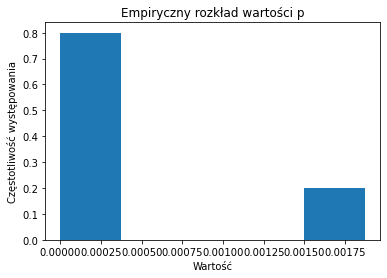

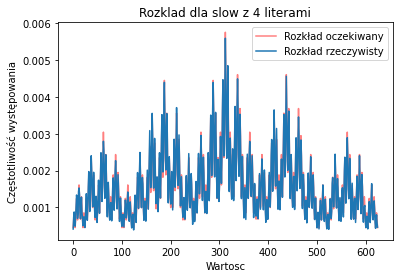

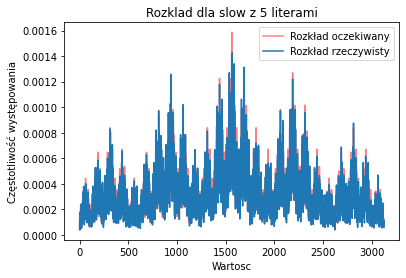

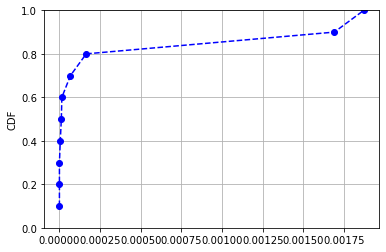

In [12]:
from collections import Counter
import numpy as np
import scipy.stats
import random
import math
import matplotlib.pyplot as plt
from scipy import stats as sc
import pylab

probability_letters = [37/256, 56/265,70/256,56/256,37/256]
data_2 = open("file.bin", "rb")
data = np.fromfile(data_2, dtype=np.uint32)
p_vals=[]
chsqs = []
MEAN = 2500
STAND = math.sqrt(5000)
def Look_histogram(frqs, exp, w_length):
    sum_freq = sum(frqs)
    sum_expected = sum(exp)
    x_s = np.linspace(0, len(frqs) - 1, num=len(frqs))
    y_axis = [frqs[i] / sum_freq for i in range(len(frqs))]

    if w_length == 4:
        s = 0
        e = 625
    elif w_length == 5:
        s = 0
        e = 3125

    y_axis_exp = [exp[i] / sum_expected for i in range(len(exp))]
    plt.plot(x_s, y_axis_exp, 'red', label="Rozkład oczekiwany", alpha = 0.5)
    plt.plot(x_s, y_axis, label='Rozkład rzeczywisty')
    plt.title("Rozklad dla slow z "+str(w_length)+' literami')
    plt.xlabel("Wartosc")
    plt.ylabel("Częstotliwość występowania")
    plt.legend(loc="upper right")
    plt.show()

def Look_CDF(data):
    d_leng=len(data)
    d_sorted=sorted(set(data))
    bins=np.append(d_sorted, d_sorted[-1]+1)
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    counts=counts.astype(float)/d_leng
    Look_CDF = np.cumsum(counts)
    plt.plot(bin_edges[0:-1], Look_CDF,linestyle='--', marker="o", color='b')
    plt.ylim((0,1))
    plt.ylabel("CDF")
    plt.grid(True)
    plt.show()

def count_ones(ones):
    counter = 0
    while ones:
        counter += ones & 1
        ones = ones >> 1
    return counter

def phi(z):
    tmp = z/math.sqrt(2.)
    tmp = 1+math.erf(tmp)
    return tmp/2
	
def d_letters(letter):
    choose = {
        0:"A",1:"A",2:"A",
        3:"B",
        4:"C",
        5:"D",
        6:"E",7:"E",8:"E"
    }
    return choose.get(letter)

for test in range(10):
    table = []
    words5 = []
    words4 = []
    cnt_5=3125
    cnt_4=625
    
    for number in range(256004):
        table.append(int(random.random()*255.0))
        
        ###########Nasz generator#####################
        #table.append(int(data[1+test+number*256004]))
   
    
    i = 0
    while i < len(table) - 4:
        abcde = [
            count_ones(table[i]),
            count_ones(table[i + 1]),
            count_ones(table[i + 2]),
            count_ones(table[i + 3]),
            count_ones(table[i + 4])
        ]
        abcde[0] = d_letters(abcde[0])
        abcde[1] = d_letters(abcde[1])
        abcde[2] = d_letters(abcde[2])
        abcde[3] = d_letters(abcde[3])
        abcde[4] = d_letters(abcde[4])
    
        words5.append(str(abcde[0]) + str(abcde[1]) + str(abcde[2]) + str(abcde[3]) + str(abcde[4]))
    
        i = i + 1
    
    i = 0
    while i < len(table) - 4:
        abcde = [
            count_ones(table[i]),
            count_ones(table[i + 1]),
            count_ones(table[i + 2]),
            count_ones(table[i + 3])
        ]
        abcde[0] = d_letters(abcde[0])
        abcde[1] = d_letters(abcde[1])
        abcde[2] = d_letters(abcde[2])
        abcde[3] = d_letters(abcde[3])
    
        words4.append(str(abcde[0]) + str(abcde[1]) + str(abcde[2]) + str(abcde[3]))
    
        i = i + 1
    
    count4= [0] * cnt_4
    for abcde_word in range(cnt_4):
        temp=abcde_word
        freq=256000
        for letter in range(4):
            freq*=probability_letters[temp%5]
            temp=math.floor(temp/5)
        count4[abcde_word]=freq
        
    count5=[0] * cnt_5
    for abcde_word in range(cnt_5):
        temp=abcde_word
        freq=256000
        for letter in range(5):
            freq*=probability_letters[temp%5]
            temp=math.floor(temp/5)
        count5[abcde_word]=freq
    
    
    sort4 = Counter(words4)
    p4 = [0] * cnt_4
    i = 0
    for key in sorted(sort4):
        p4[i] = sort4[key]
        i = i + 1
        
        
    sort5 = Counter(words5)
    p5 = [0] * cnt_5
    i = 0
    for key in sorted(sort5):
        p5[i] = sort5[key]
        i = i + 1
        
    chi4 = 0
    for i in range(cnt_4):
        chi4 += ((p4[i] - count4[i]) ** 2) /count4[i]
    
    chi5 = 0
    for i in range(cnt_5):
        chi5 += ((p5[i] - count5[i]) ** 2) /count5[i]
        
    chsq = chi5 - chi4
    z = (chsq - MEAN) / STAND
    p = 1 - phi(z)
    
    p_vals.append(p)
    chsqs.append(chsq)
    
print(chsqs)
print(p_vals)

stat, ks_test_val = sc.kstest(p_vals,'uniform')
x_s = np.linspace(0, len(p_vals) - 1, num=len(p_vals))
plt.hist(p_vals, bins = len(p_vals) //2, weights=np.zeros_like(p_vals) + 1. / len(p_vals))
plt.title("Empiryczny rozkład wartości p")
plt.xlabel("Wartość")
plt.ylabel("Częstotliwość występowania")
plt.show()


Look_histogram(p4, count4, 4)
Look_histogram(p5, count5, 5)
Look_CDF(p_vals)


